In [1]:
from sklearn import datasets
from sklearn import model_selection
from sklearn import preprocessing
from sklearn import linear_model
from sklearn import metrics

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, RNN, LSTM, GRU, SpatialDropout1D, Dropout

In [3]:
import matplotlib.pyplot as plt
import os, os.path, sys

Pravljenje Srednje vrednosti svih putanja. Napravljena je putanja ka direktorijumu koji sadrzi podatke za X-osu bez desinhronizacije, gde je potom iterirano kroz direktorijum i pokupljene su sve informacije iz adekvatnih txt fajlova

In [4]:
path = r"C:\Users\mata2\Desktop\master\Axis-projection-RNN\podaci\0k\X"

In [5]:
dir = os.listdir(path)

Napravljen je pandas DataFrame gde su atributi zasebno pokrenute putanje, dok ce ciljna promenljiva da bude srednja vrednost svih putanja

In [6]:
file_names = []
for file in dir:
    file_names.append(file)

In [7]:
main_df = pd.DataFrame()
for file in file_names:
    new_path = path + '\\' + file
    main_df[file] = pd.read_csv(new_path)

In [8]:
main_df = main_df[:61000]

In [9]:
main_df = main_df.astype('int')

In [10]:
main_df.head()

,x-0k_v1.txt,x-0k_v10.txt,x-0k_v11.txt,x-0k_v12.txt,x-0k_v13.txt,x-0k_v14.txt,x-0k_v15.txt,x-0k_v16.txt,x-0k_v17.txt,x-0k_v18.txt,...,x-0k_v28.txt,x-0k_v29.txt,x-0k_v3.txt,x-0k_v30.txt,x-0k_v4.txt,x-0k_v5.txt,x-0k_v6.txt,x-0k_v7.txt,x-0k_v8.txt,x-0k_v9.txt
0,0,0,0,0,-1,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,-1,-1,0,0,0,0,...,0,0,1,1,0,0,1,0,1,0
2,2,2,0,2,1,1,1,2,1,1,...,2,2,5,5,1,1,5,1,5,4
3,5,5,2,5,6,5,5,6,5,5,...,5,4,11,11,4,4,11,4,11,11
4,10,11,7,10,12,11,12,12,12,11,...,11,8,20,20,10,10,20,10,21,20


In [11]:
X = main_df['x-0k_v1.txt']
y = main_df['x-0k_v10.txt']

In [15]:
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        end_ix = i + n_steps
        if end_ix > len(sequence) - 1:
            break
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)


n_steps = 1
features = 1
# split into samples
X_train, y_train = split_sequence(X, n_steps)


In [23]:
scaler = preprocessing.StandardScaler()

In [24]:
scaler.fit(X_train)

StandardScaler()

In [25]:
X_train = scaler.transform(X_train)

In [17]:
# Reshaping X_train for model
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],features)

In [19]:
# The LSTM architecture
model_lstm = Sequential()
model_lstm.add(LSTM(units=32, activation="relu", input_shape=(n_steps, features)))
model_lstm.add(Dense(units=32, activation="relu"))
model_lstm.add(Dense(units=32, activation="relu"))
model_lstm.add(Dense(units=1, activation="relu"))
# Compiling the model
model_lstm.compile(optimizer="adam", loss="mse")

model_lstm.summary()




Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 32)                4352      
                                                                 
 dense (Dense)               (None, 32)                1056      
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 6497 (25.38 KB)
Trainable params: 6497 (25.38 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [20]:
model_lstm.fit(X_train, y_train, epochs=10, batch_size=64)

Epoch 1/10

954/954 [==============================] - 4s 2ms/step - loss: 816561664.0000
Epoch 2/10
954/954 [==============================] - 2s 2ms/step - loss: 1459.9528
Epoch 3/10
954/954 [==============================] - 2s 2ms/step - loss: 1459.3462
Epoch 4/10
954/954 [==============================] - 2s 2ms/step - loss: 1462.3235
Epoch 5/10
954/954 [==============================] - 2s 2ms/step - loss: 1475.6564
Epoch 6/10
954/954 [==============================] - 2s 2ms/step - loss: 1488.3102
Epoch 7/10
954/954 [==============================] - 2s 2ms/step - loss: 1524.8754
Epoch 8/10
954/954 [==============================] - 2s 2ms/step - loss: 1575.0723
Epoch 9/10
954/954 [==============================] - 2s 2ms/step - loss: 1745.3737
Epoch 10/10
954/954 [==============================] - 2s 2ms/step - loss: 2245.3105


In [21]:
X_test, y_test = split_sequence(y, n_steps)

In [22]:
predic = model_lstm.predict(X_test)

1907/1907 [==============================] - 2s 1ms/step


In [124]:
aa = model_lstm.evaluate(predic, y_test)

1905/1905 [==============================] - 2s 1ms/step - loss: 0.4605


In [38]:
model = Sequential()
model.add(SimpleRNN(units = 16, input_shape = (29,1), activation = keras.layers.LeakyReLU()))
#model.add(Dropout(0.05))
model.add(Dense(units = 1, activation=keras.layers.LeakyReLU(), bias_initializer='zeros', kernel_initializer='normal'))
model.compile(loss='mean_squared_error', optimizer = 'adam')

In [ ]:
model_selection.TimeSeriesSplit()

Potencijalni time_stepovi su (1, 2, 4, 5, 8, 10, 20, 25, 40, 50, 61, 100), kako bi bili deljivi sa 61000

In [101]:
def get_XY(dat, time_steps):
    # Indices of target array
    Y_ind = np.arange(time_steps, len(dat), time_steps)
    Y = dat[Y_ind]
    # Prepare X
    rows_x = len(Y)
    X = dat[range(time_steps*rows_x)]
    X = np.reshape(X, (rows_x, time_steps, 1))    
    return X, Y, Y_ind
 
time_steps = 20
trainX, trainY, Y_ind = get_XY(train_data, time_steps)
testX, testY, Y_ind = get_XY(test_data, time_steps)

In [102]:
units = 16
input_shape = (time_steps,1)
dense_units = 1

units = [2**x for x in range(8)]
batch_size = [2**x for x in range(7)]
#time_steps = [8,10,20,25,40,50,61,100]

best_units = None
best_batch = None
best_steps = None
best_skor = float('-inf')

for unit in units:
    for batch in batch_size:
        model = Sequential([
            SimpleRNN(units=unit, input_shape = input_shape, activation = keras.layers.LeakyReLU()),
            Dense(units = 1, activation=keras.layers.LeakyReLU(),bias_initializer='zeros', kernel_initializer='normal')
        ])
        model.compile(loss='mean_squared_error', optimizer = 'adam')
        
        model.fit(trainX, trainY, epochs = 10, batch_size = batch)
        x_predict = model.predict(trainX)
        
        num_correct = 0
        for i in range(len(x_predict)):
            if x_predict[i] > min_koord[Y_ind][i] and x_predict[i] < max_koord[Y_ind][i]:
                #print(scaler.inverse_transform(min_koord)[Y_ind][i], scaler.inverse_transform(x_predict)[i], scaler.inverse_transform(max_koord)[Y_ind][i])
                num_correct += 1
        print(num_correct, unit)        
        if num_correct > best_skor:
            best_skor = num_correct
            best_units = unit
            best_batch = batch

print("best skor: ", best_skor)
print("best unit: ", best_units)
print("best batch: ", best_batch)

In [113]:
model = Sequential()
model.add(SimpleRNN(units = 16, input_shape = input_shape, activation = keras.layers.LeakyReLU()))
#model.add(Dropout(0.05))
model.add(Dense(units = dense_units, activation=keras.layers.LeakyReLU(), bias_initializer='zeros', kernel_initializer='normal'))
model.compile(loss='mean_squared_error', optimizer = 'adam')

In [59]:
np.random.seed(61000)

In [114]:
history = model.fit(trainX, trainY, epochs=10, batch_size = 2, verbose = 2)

Epoch 1/10
1525/1525 - 5s - loss: 0.0134 - 5s/epoch - 4ms/step
Epoch 2/10
1525/1525 - 4s - loss: 1.7341e-05 - 4s/epoch - 3ms/step
Epoch 3/10
1525/1525 - 4s - loss: 1.5609e-04 - 4s/epoch - 3ms/step
Epoch 4/10
1525/1525 - 4s - loss: 4.1103e-06 - 4s/epoch - 3ms/step
Epoch 5/10
1525/1525 - 4s - loss: 3.1817e-05 - 4s/epoch - 3ms/step
Epoch 6/10
1525/1525 - 4s - loss: 7.9344e-06 - 4s/epoch - 3ms/step
Epoch 7/10
1525/1525 - 4s - loss: 1.2199e-05 - 4s/epoch - 3ms/step
Epoch 8/10
1525/1525 - 4s - loss: 4.7460e-05 - 4s/epoch - 3ms/step
Epoch 9/10
1525/1525 - 4s - loss: 6.4404e-07 - 4s/epoch - 3ms/step
Epoch 10/10
1525/1525 - 4s - loss: 1.1000e-05 - 4s/epoch - 3ms/step


In [115]:
def plot_graphs(history):
    plt.figure(figsize=(10, 4))

    plt.subplot(1, 2, 1)
    plt.title('Loss')
    plt.plot(history.epoch, history.history['loss'], label='training')
    plt.legend(loc='best')
    plt.xlabel('Epochs')

    plt.show()

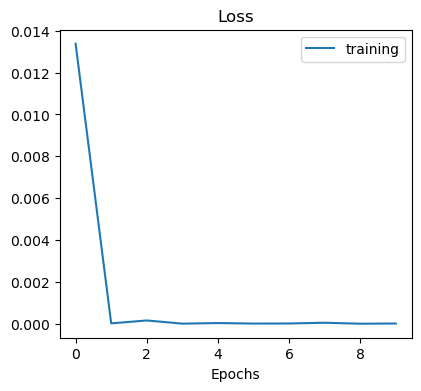

In [116]:
plot_graphs(history)

In [117]:
train_scores = model.evaluate(testX, testY)

96/96 [==============================] - 0s 2ms/step - loss: 1.7234e-07


In [118]:
x_predict = model.predict(trainX)
test_predict = model.predict(testX)

96/96 [==============================] - 0s 1ms/step


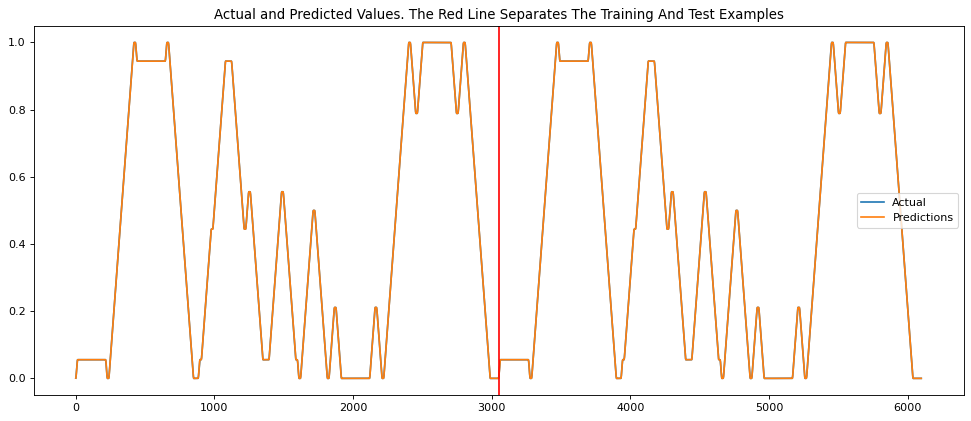

In [119]:
# Plot the result
def plot_result(trainY, testY, x_predict, test_predict):
    actual = np.append(trainY, testY)
    predictions = np.append(x_predict, test_predict)
    rows = len(actual)
    plt.figure(figsize=(15, 6), dpi=80)
    plt.plot(range(rows), actual)
    plt.plot(range(rows), predictions)
    plt.axvline(x=len(trainY), color='r')
    plt.legend(['Actual', 'Predictions'])
    plt.title('Actual and Predicted Values. The Red Line Separates The Training And Test Examples')
plot_result(trainY, testY, x_predict, test_predict)

In [66]:
max_koord = pd.read_csv(r"C:\Users\mata2\Desktop\jupyter\Master rad\Matija_Grulovic\podaci\0k\X_max_koord_0k.txt", names=['x osa'])
min_koord = pd.read_csv(r"C:\Users\mata2\Desktop\jupyter\Master rad\Matija_Grulovic\podaci\0k\X_min_koord_0k.txt", names=['x osa'])

In [67]:
max_koord = scaler.transform(max_koord)
min_koord = scaler.transform(min_koord)

D:\Users\mata2\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(
D:\Users\mata2\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(


In [68]:
#plt.figure(figsize=(15,5))
#plt.plot(min_koord[8300:8500])
#plt.plot(max_koord[8300:8500])

In [120]:
num_correct = 0
for i in range(len(x_predict)):
    if x_predict[i] > min_koord[Y_ind][i] and x_predict[i] < max_koord[Y_ind][i]:
        print(scaler.inverse_transform(min_koord)[Y_ind][i], scaler.inverse_transform(x_predict)[i], scaler.inverse_transform(max_koord)[Y_ind][i])
        num_correct += 1

[472.] [482.96884] [492.]
[10001.] [10001.557] [10025.]
[9999.] [10009.645] [10012.]
[737.] [741.5149] [749.]
[31.] [54.39421] [59.]
[-25.] [-8.248149] [-3.]
[-20.] [-5.539616] [-3.]
[-14.] [-2.7170546] [0.]
[243.] [274.67877] [278.]
[38248.] [38253.25] [38256.]
[70243.] [70249.266] [70255.]
[159244.] [159244.81] [159253.]
[160242.] [160243.36] [160251.]
[161244.] [161244.69] [161257.]
[163248.] [163248.4] [163257.]
[167247.] [167247.05] [167257.]
[171246.] [171247.53] [171256.]
[172247.] [172249.11] [172257.]
[173249.] [173252.47] [173259.]
[174252.] [174255.7] [174258.]
[175251.] [175252.16] [175259.]
[176253.] [176253.02] [176259.]
[177252.] [177254.81] [177260.]
[179507.] [179509.4] [179519.]
[179807.] [179813.47] [179860.]
[179989.] [180006.1] [180031.]
[179990.] [180013.77] [180029.]
[179990.] [180004.33] [180009.]
[179991.] [180003.03] [180005.]
[179860.] [179875.58] [179887.]
[179510.] [179516.81] [179528.]
[178946.] [178949.83] [178957.]
[178188.] [178199.31] [178204.]
[170028

[118741.] [118742.87] [118755.]
[117740.] [117741.836] [117755.]
[116741.] [116741.13] [116752.]
[104740.] [104740.33] [104752.]
[73742.] [73743.2] [73749.]
[13741.] [13745.928] [13750.]
[135.] [159.26097] [167.]
[-31.] [-6.457217] [5.]
[-27.] [-10.770209] [2.]
[-24.] [-2.1764214] [0.]
[10005.] [10020.197] [10033.]
[10004.] [10020.08] [10030.]
[10104.] [10105.713] [10145.]
[70745.] [70748.04] [70755.]
[79917.] [79919.234] [79953.]
[169818.] [169822.05] [169858.]
[169993.] [170006.03] [170028.]
[170002.] [170006.17] [170026.]
[169993.] [169998.56] [170014.]
[169992.] [169999.05] [170004.]
[169994.] [169999.08] [170004.]
[169994.] [169999.08] [170004.]
[169994.] [169999.08] [170004.]
[169994.] [169999.08] [170004.]
[169994.] [169999.08] [170004.]
[169994.] [169999.08] [170004.]
[169994.] [169999.28] [170004.]
[169994.] [169999.66] [170004.]
[169994.] [169998.81] [170004.]
[169994.] [169999.02] [170004.]
[169994.] [169999.08] [170004.]
[169994.] [169999.08] [170004.]
[169994.] [169999.08]

In [121]:
(num_correct/(len(x_predict)))

0.18432272876352904

In [122]:
for i in range(len(x_predict)):
    print(scaler.inverse_transform(min_koord)[Y_ind][i], scaler.inverse_transform(x_predict)[i], scaler.inverse_transform(max_koord)[Y_ind][i])

[115.] [137.10707] [135.]
[472.] [482.96884] [492.]
[1044.] [1006.0623] [1056.]
[1788.] [1714.0618] [1798.]
[2740.] [2603.3674] [2758.]
[3746.] [3563.2678] [3759.]
[4748.] [4538.017] [4760.]
[5747.] [5587.5303] [5761.]
[6750.] [6936.3] [6759.]
[7750.] [7977.1187] [7758.]
[8608.] [8810.669] [8616.]
[9251.] [9416.33] [9260.]
[9691.] [9805.315] [9716.]
[9933.] [9971.391] [9967.]
[10001.] [10001.557] [10025.]
[9999.] [10009.645] [10012.]
[9992.] [10009.785] [10008.]
[9993.] [10009.831] [10003.]
[9993.] [10009.831] [10003.]
[9994.] [10009.831] [10003.]
[9994.] [10009.831] [10003.]
[9994.] [10009.831] [10003.]
[9994.] [10009.831] [10003.]
[9994.] [10009.479] [10003.]
[9994.] [10010.116] [10003.]
[9993.] [10010.018] [10003.]
[9994.] [10010.018] [10003.]
[9993.] [10009.687] [10003.]
[9995.] [10009.831] [10003.]
[9995.] [10009.831] [10003.]
[9995.] [10009.832] [10003.]
[9995.] [10009.832] [10003.]
[9995.] [10009.831] [10003.]
[9995.] [10009.831] [10003.]
[9995.] [10009.831] [10003.]
[9995.] [10

[74246.] [74217.53] [74258.]
[75247.] [75215.63] [75258.]
[76246.] [76214.21] [76258.]
[77245.] [77214.23] [77255.]
[78243.] [78210.945] [78256.]
[79244.] [79212.945] [79255.]
[80243.] [80211.41] [80254.]
[81244.] [81213.94] [81254.]
[82243.] [82212.7] [82253.]
[83245.] [83213.62] [83255.]
[84247.] [84215.86] [84255.]
[85248.] [85218.63] [85259.]
[86246.] [86217.88] [86257.]
[87248.] [87217.35] [87256.]
[88246.] [88216.08] [88254.]
[89248.] [89218.836] [89256.]
[90248.] [90218.23] [90255.]
[91247.] [91218.266] [91254.]
[92246.] [92217.875] [92253.]
[93246.] [93218.33] [93254.]
[94245.] [94216.875] [94253.]
[95246.] [95218.21] [95252.]
[96246.] [96218.336] [96252.]
[97245.] [97219.34] [97252.]
[98245.] [98218.69] [98252.]
[99246.] [99221.19] [99255.]
[100246.] [100220.11] [100254.]
[101248.] [101221.82] [101255.]
[102247.] [102222.36] [102254.]
[103248.] [103223.79] [103256.]
[104248.] [104222.414] [104255.]
[105246.] [105224.09] [105254.]
[106249.] [106224.914] [106255.]
[107248.] [107

[169994.] [170001.06] [170002.]
[169994.] [170001.06] [170002.]
[169994.] [170001.06] [170002.]
[169994.] [170001.06] [170002.]
[169994.] [170001.06] [170002.]
[169994.] [170001.06] [170002.]
[169994.] [170001.06] [170002.]
[169994.] [170001.06] [170002.]
[169994.] [170001.06] [170002.]
[169994.] [170001.06] [170002.]
[169994.] [170001.06] [170002.]
[169994.] [170001.06] [170002.]
[169994.] [170001.06] [170002.]
[169994.] [170001.06] [170002.]
[169994.] [170001.06] [170002.]
[169994.] [170001.06] [170002.]
[169994.] [170001.06] [170002.]
[169994.] [170001.06] [170002.]
[169994.] [170001.06] [170002.]
[169994.] [170001.06] [170002.]
[169994.] [170001.06] [170002.]
[169994.] [170001.06] [170002.]
[169994.] [170001.06] [170002.]
[169994.] [170001.06] [170002.]
[169994.] [170001.06] [170002.]
[169994.] [170001.06] [170002.]
[169995.] [170001.73] [170002.]
[169995.] [170001.34] [170002.]
[169994.] [170001.03] [170002.]
[169995.] [170000.86] [170002.]
[169994.] [170000.94] [170002.]
[169994.

[10004.] [10020.08] [10030.]
[9990.] [10006.201] [10006.]
[9992.] [10007.442] [10005.]
[9993.] [10007.194] [10004.]
[9996.] [10007.194] [10004.]
[9996.] [10007.194] [10004.]
[9996.] [10007.194] [10004.]
[9996.] [10007.194] [10004.]
[10104.] [10105.713] [10145.]
[10469.] [10397.068] [10500.]
[11041.] [10928.174] [11059.]
[11788.] [11743.296] [11813.]
[12739.] [12720.877] [12756.]
[13745.] [13720.777] [13759.]
[14745.] [14717.497] [14757.]
[15745.] [15698.875] [15757.]
[16746.] [16685.934] [16758.]
[17746.] [17678.51] [17759.]
[18745.] [18664.959] [18758.]
[19746.] [19663.72] [19758.]
[20745.] [20663.244] [20758.]
[21742.] [21668.951] [21756.]
[22747.] [22703.984] [22755.]
[23746.] [23744.428] [23755.]
[24746.] [24796.098] [24754.]
[25747.] [25894.83] [25755.]
[26747.] [26779.52] [26756.]
[27750.] [27634.387] [27758.]
[28750.] [28622.918] [28758.]
[29750.] [29643.928] [29758.]
[30748.] [30691.984] [30757.]
[31747.] [31737.92] [31756.]
[32749.] [32781.203] [32757.]
[33749.] [33807.945] [3

[102744.] [102734.016] [102754.]
[101744.] [101733.96] [101755.]
[100741.] [100731.71] [100755.]
[99742.] [99732.97] [99754.]
[98742.] [98731.37] [98752.]
[97741.] [97728.43] [97750.]
[96739.] [96727.06] [96749.]
[95739.] [95728.664] [95751.]
[94742.] [94728.35] [94751.]
[93740.] [93726.91] [93750.]
[92741.] [92727.17] [92750.]
[91741.] [91727.64] [91750.]
[90742.] [90728.92] [90751.]
[89743.] [89728.125] [89752.]
[88741.] [88727.27] [88750.]
[87741.] [87726.68] [87750.]
[86740.] [86725.016] [86750.]
[85742.] [85724.45] [85749.]
[84743.] [84727.086] [84750.]
[83744.] [83726.69] [83752.]
[82742.] [82725.] [82750.]
[81783.] [81774.72] [81790.]
[81036.] [81026.586] [81047.]
[80478.] [80471.32] [80490.]
[80142.] [80166.6] [80173.]
[79972.] [79967.91] [80005.]
[79976.] [79969.445] [79998.]
[79980.] [79967.33] [79997.]
[79984.] [79967.45] [80000.]
[79987.] [79969.06] [80000.]
[79993.] [79969.46] [80000.]
[79994.] [79969.46] [80001.]
[79994.] [79969.46] [80001.]
[79994.] [79969.46] [80001.]
[

[91246.] [91224.09] [91257.]
[92246.] [92221.85] [92255.]
[93246.] [93224.17] [93256.]
[94246.] [94223.71] [94255.]
[95246.] [95225.91] [95256.]
[96246.] [96223.48] [96255.]
[97246.] [97223.09] [97254.]
[98208.] [98174.58] [98214.]
[98948.] [98924.125] [98962.]
[99506.] [99478.58] [99521.]
[99822.] [99806.86] [99857.]
[99992.] [99980.09] [100029.]
[99998.] [99989.94] [100030.]
[99987.] [99974.516] [100007.]
[99990.] [99974.5] [100004.]
[99994.] [99974.586] [100003.]
[99994.] [99974.586] [100004.]
[99994.] [99974.586] [100004.]
[99994.] [99974.586] [100004.]
[99994.] [99974.586] [100004.]
[99860.] [99839.66] [99898.]
[99511.] [99484.03] [99542.]
[98944.] [98922.195] [98965.]
[98183.] [98169.27] [98207.]
[97245.] [97228.375] [97259.]
[96235.] [96232.03] [96253.]
[95240.] [95234.91] [95252.]
[94240.] [94234.484] [94253.]
[93241.] [93234.164] [93253.]
[92240.] [92234.9] [92253.]
[91242.] [91236.89] [91252.]
[90242.] [90225.14] [90252.]
[89240.] [89225.76] [89253.]
[88240.] [88225.18] [8825

[30744.] [30774.654] [30750.]
[29743.] [29726.193] [29750.]
[28743.] [28691.799] [28750.]
[27743.] [27705.354] [27750.]
[26740.] [26832.223] [26748.]
[25740.] [25986.467] [25748.]
[24742.] [24941.492] [24750.]
[23742.] [23845.14] [23748.]
[22741.] [22790.002] [22749.]
[21741.] [21754.035] [21750.]
[20743.] [20712.648] [20750.]
[19743.] [19696.465] [19750.]
[18743.] [18698.254] [18749.]
[17743.] [17699.875] [17749.]
[16743.] [16707.703] [16749.]
[15742.] [15719.44] [15749.]
[14740.] [14728.399] [14748.]
[13741.] [13745.227] [13749.]
[12742.] [12758.2705] [12748.]
[11742.] [11761.675] [11748.]
[10744.] [10708.628] [10751.]
[9745.] [9777.133] [9751.]
[8744.] [9080.692] [8751.]
[7744.] [8221.636] [7750.]
[6743.] [7133.3877] [6750.]
[5741.] [5800.703] [5749.]
[4740.] [4644.726] [4747.]
[3741.] [3653.7898] [3748.]
[2742.] [2677.2998] [2750.]
[1785.] [1747.3027] [1792.]
[1039.] [1028.6831] [1046.]
[480.] [500.15506] [493.]
[145.] [160.32747] [175.]
[-29.] [-3.441476] [-7.]
[-26.] [-5.3679013]

[170245.] [170242.] [170254.]
[171246.] [171242.73] [171255.]
[172247.] [172243.9] [172255.]
[173249.] [173245.27] [173258.]
[174252.] [174249.6] [174258.]
[175251.] [175250.06] [175259.]
[176253.] [176252.47] [176259.]
[177252.] [177254.75] [177260.]
[178210.] [178205.5] [178217.]
[178948.] [178945.33] [178961.]
[179502.] [179509.11] [179521.]
[179818.] [179796.5] [179860.]
[179994.] [180000.88] [180031.]
[180001.] [180008.3] [180031.]
[179991.] [180005.81] [180014.]
[179992.] [180006.16] [180003.]
[179994.] [180006.16] [180003.]
[179994.] [180006.16] [180003.]
[179994.] [180006.16] [180003.]
[179994.] [180006.16] [180003.]
[179994.] [180006.16] [180003.]
[179855.] [179885.86] [179896.]
[179500.] [179522.97] [179533.]
[178945.] [178947.5] [178958.]
[178184.] [178194.23] [178207.]
[177247.] [177258.19] [177259.]
[176237.] [176250.66] [176250.]
[175238.] [175249.77] [175249.]
[174237.] [174254.14] [174247.]
[173237.] [173251.84] [173246.]
[172239.] [172250.28] [172246.]
[171239.] [17125

[179995.] [180004.16] [180004.]
[179995.] [180004.16] [180004.]
[179995.] [180004.16] [180004.]
[179995.] [180004.16] [180004.]
[179995.] [180004.16] [180004.]
[179995.] [180004.16] [180004.]
[179995.] [180003.95] [180004.]
[179995.] [180003.86] [180004.]
[179995.] [180003.19] [180005.]
[179995.] [180003.8] [180004.]
[179995.] [180004.16] [180004.]
[179995.] [180004.16] [180004.]
[179995.] [180004.16] [180004.]
[179995.] [180004.16] [180004.]
[179995.] [180004.16] [180004.]
[179995.] [180004.16] [180004.]
[179995.] [180004.16] [180004.]
[179957.] [179959.78] [179977.]
[179725.] [179718.05] [179748.]
[179244.] [179244.33] [179273.]
[178593.] [178601.86] [178612.]
[177740.] [177745.92] [177757.]
[176742.] [176753.17] [176749.]
[175741.] [175752.14] [175749.]
[174739.] [174753.31] [174748.]
[173740.] [173750.86] [173747.]
[172740.] [172751.36] [172746.]
[171740.] [171750.95] [171747.]
[170740.] [170750.23] [170748.]
[169739.] [169749.4] [169747.]
[168739.] [168748.66] [168746.]
[167740.] 

[-9.] [5.659407] [1.]
[-6.] [5.093285] [1.]
[-6.] [5.2247543] [1.]
[-6.] [5.2515845] [1.]
[-6.] [5.2515845] [1.]
[-6.] [5.2515845] [1.]
[-6.] [5.2515845] [1.]
[-6.] [5.2515845] [1.]
[-6.] [5.2515845] [1.]
[-6.] [5.2515845] [1.]
[-6.] [5.2515845] [1.]
[-6.] [5.2515845] [1.]
[-6.] [5.2515845] [1.]
[-6.] [5.2515845] [1.]
[-6.] [5.2515845] [1.]
[-6.] [5.2515845] [1.]
[-6.] [5.2515845] [1.]
[-5.] [5.2515845] [1.]
[-6.] [5.2515845] [1.]
[-6.] [5.2515845] [1.]
[-6.] [5.2515845] [1.]
[-6.] [5.2515845] [1.]
[-6.] [5.2515845] [1.]
[-6.] [5.2515845] [1.]
[-6.] [5.2515845] [1.]
[-6.] [5.2515845] [1.]
[-6.] [5.2515845] [1.]
[-6.] [4.9269366] [1.]
[-6.] [5.2515845] [1.]
[-6.] [5.2515845] [1.]
[-6.] [5.2515845] [1.]
[-6.] [5.2515845] [1.]
[-6.] [5.2515845] [1.]
[-6.] [5.2515845] [1.]
[-6.] [5.2515845] [1.]
[-6.] [5.2515845] [1.]
[-6.] [5.2515845] [1.]
[-6.] [5.2515845] [1.]
[-6.] [5.2515845] [1.]
[-6.] [5.2515845] [1.]
[-6.] [5.2515845] [1.]
[-6.] [5.2515845] [1.]
[-6.] [5.2515845] [1.]
[-6.] [5.2515

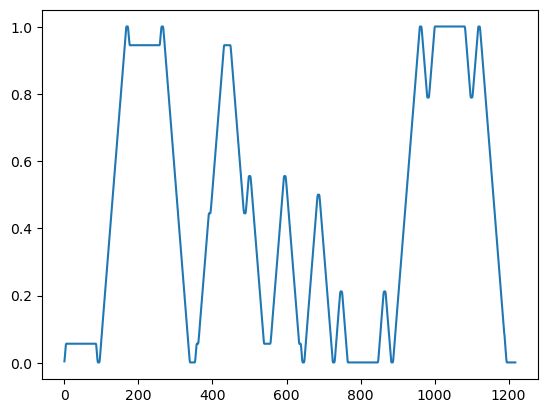

In [72]:
plt.plot(x_predict)